In [2]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, scale, LabelEncoder
from sklearn.model_selection import train_test_split

In [3]:
#read dataset
df = pd.read_csv('creditcard.csv')

In [4]:
df.head()

,Merchant_id,Transaction date,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,NaN,100.0,3000.0,N,5,Y,Y,0,0.0,0,Y
1,3160040998,NaN,100.0,4300.0,N,5,Y,Y,0,0.0,0,Y
2,3160041896,NaN,185.5,4823.0,Y,5,N,N,0,0.0,0,Y
3,3160141996,NaN,185.5,5008.5,Y,8,N,N,0,0.0,0,Y
4,3160241992,NaN,500.0,26000.0,N,0,Y,Y,800,677.2,6,Y


In [5]:
df.shape

(3075, 12)

In [6]:
df.dtypes

Merchant_id                         int64
Transaction date                  float64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                        object
Total Number of declines/day        int64
isForeignTransaction               object
isHighRiskCountry                  object
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                        object
dtype: object

In [7]:
#trouver ls colonnes avec des null
df.isnull().sum()

Merchant_id                          0
Transaction date                  3075
Average Amount/transaction/day       0
Transaction_amount                   0
Is declined                          0
Total Number of declines/day         0
isForeignTransaction                 0
isHighRiskCountry                    0
Daily_chargeback_avg_amt             0
6_month_avg_chbk_amt                 0
6-month_chbk_freq                    0
isFradulent                          0
dtype: int64

In [8]:
#droper les colonnes avec des nulls
df = df.drop('Transaction date', axis = 1)

In [9]:
# convertir les valeurs catégoriques(de type object) en numérique
df['isFradulent'] = df.isFradulent.replace({'N': 0, 'Y': 1})
df['Is declined'] = df['Is declined'].replace({'N': 0, 'Y': 1})
df['isForeignTransaction'] = df['isForeignTransaction'].replace({'N': 0, 'Y': 1})
df['isHighRiskCountry'] = df['isHighRiskCountry'].replace({'N': 0, 'Y': 1})

In [10]:
#compter le nombre d'examples par chaque classe à prédire
df['isFradulent'].value_counts()

0    2627
1     448
Name: isFradulent, dtype: int64

In [11]:
df.dtypes

Merchant_id                         int64
Average Amount/transaction/day    float64
Transaction_amount                float64
Is declined                         int64
Total Number of declines/day        int64
isForeignTransaction                int64
isHighRiskCountry                   int64
Daily_chargeback_avg_amt            int64
6_month_avg_chbk_amt              float64
6-month_chbk_freq                   int64
isFradulent                         int64
dtype: object

C:\Users\Formation\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


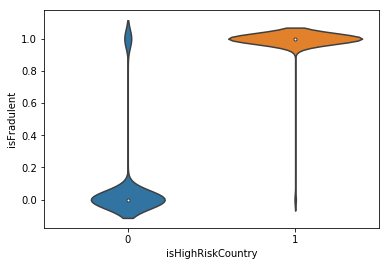

In [12]:
sns.violinplot(y='isFradulent', x='isHighRiskCountry', data=df)
plt.show()

In [13]:
 X = df.drop(['isFradulent', 'Merchant_id'], axis=1)
 Y = df['isFradulent']

In [14]:
x = scale(X)

C:\Users\Formation\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by the scale function.
  """Entry point for launching an IPython kernel.


In [15]:
x

array([[-1.42200799, -0.67856862, -0.13742882, ..., -0.26978337,
        -0.25664688, -0.25310881],
       [-1.42200799, -0.55028357, -0.13742882, ..., -0.26978337,
        -0.25664688, -0.25310881],
       [-1.12905883, -0.49867351,  7.27649424, ..., -0.26978337,
        -0.25664688, -0.25310881],
       ...,
       [ 0.97640623,  1.07794974,  7.27649424, ...,  3.37976021,
         3.49471235,  4.26819179],
       [ 3.37482045,  0.20955864,  7.27649424, ...,  3.37976021,
         3.49471235,  4.26819179],
       [ 3.37482045,  2.577898  ,  7.27649424, ...,  3.37976021,
         3.49471235,  4.26819179]])

In [16]:
#Splitter le dataset en test et train (30%)
X_train, X_test, y_train, y_test = train_test_split(x, Y, 
                                                    test_size=0.3, 
                                                    random_state=42, stratify=Y)

In [17]:
 X_train.shape

(2152, 9)

In [18]:
 y_train.shape

(2152,)

In [19]:
df.head()

,Merchant_id,Average Amount/transaction/day,Transaction_amount,Is declined,Total Number of declines/day,isForeignTransaction,isHighRiskCountry,Daily_chargeback_avg_amt,6_month_avg_chbk_amt,6-month_chbk_freq,isFradulent
0,3160040998,100.0,3000.0,0,5,1,1,0,0.0,0,1
1,3160040998,100.0,4300.0,0,5,1,1,0,0.0,0,1
2,3160041896,185.5,4823.0,1,5,0,0,0,0.0,0,1
3,3160141996,185.5,5008.5,1,8,0,0,0,0.0,0,1
4,3160241992,500.0,26000.0,0,0,1,1,800,677.2,6,1


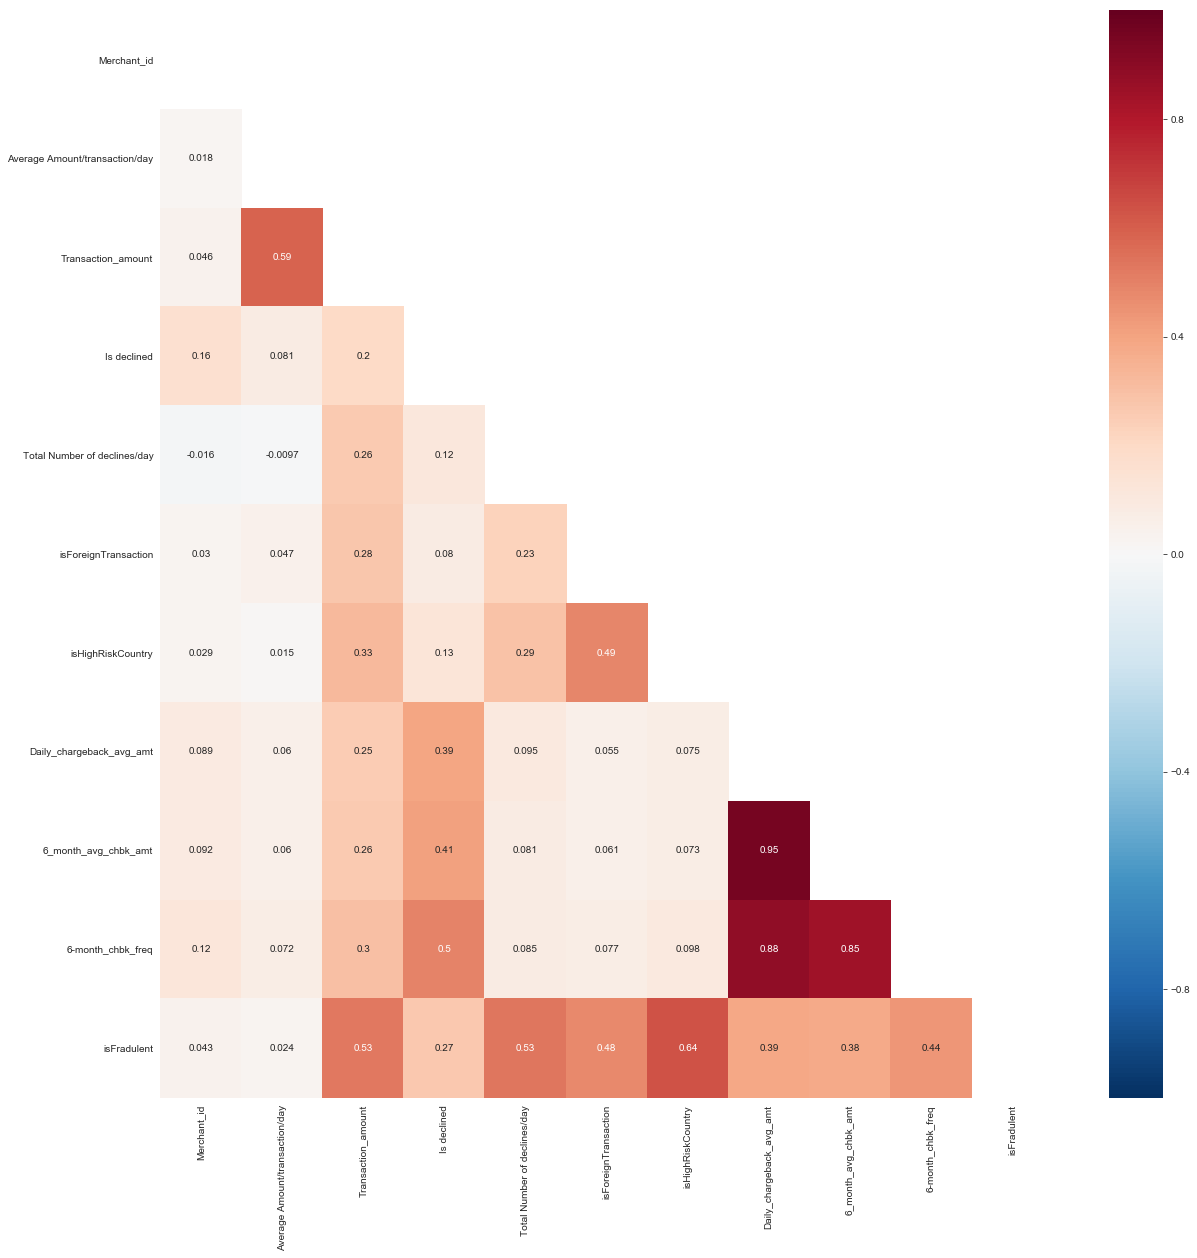

In [27]:
# la matricre de corrélation entre les variables
corr = df.corr()
# mask for the upper triangle
cleanning_mask = np.zeros_like(corr)
upper_triangle = np.triu_indices_from(corr)
cleanning_mask[upper_triangle] = 1
sns.set_style('whitegrid')
plt.figure(figsize=(20, 20))
sns.heatmap(corr, 
           mask=cleanning_mask,
           annot=True,
           cmap='RdBu_r',
           vmin=-1,
           vmax=1)
plt.show()

In [21]:
#fitter notre modèle avec svm
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)

C:\Users\Formation\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
#créer des prédictions
predictions = clf.predict(X_test)
print("Size of training set: ", X_test.shape)
print(predictions.shape)

Size of training set:  (923, 9)
(923,)


In [23]:
# Matrice de confusion 
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, predictions))
print(classification_report(y_test,predictions))

[[783   6]
 [  6 128]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       789
           1       0.96      0.96      0.96       134

   micro avg       0.99      0.99      0.99       923
   macro avg       0.97      0.97      0.97       923
weighted avg       0.99      0.99      0.99       923



In [24]:
# Afficher les scores 
from sklearn.metrics import accuracy_score
accuracy_score(y_test, predictions)

0.9869989165763814